In [1]:
# Structure de données et maths
import numpy as np
import pandas as pd


# Maths
import scipy
import math

from tqdm import tqdm

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark")

# Rappel

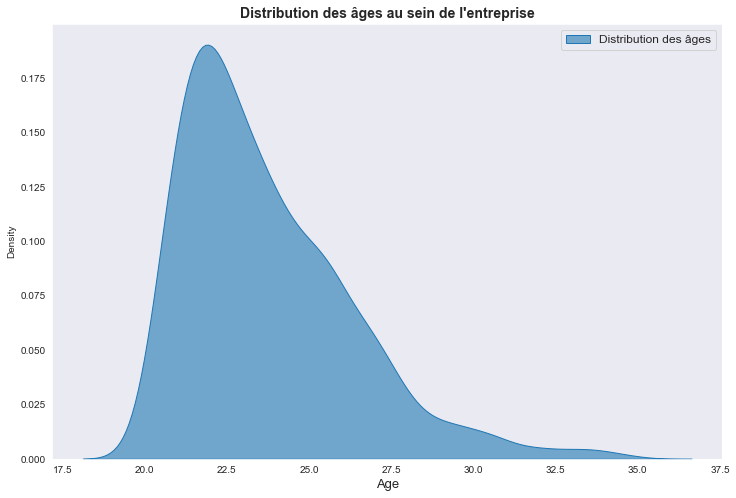

In [2]:
sigma = 2
data = 20+np.random.gamma(shape = 1.88, scale = 2, size = 1000)
plt.figure(figsize = (12, 8))
plt.title('Distribution des âges au sein de l\'entreprise', fontsize = 14, fontweight = 'bold')
sns.kdeplot(data, fill = True, alpha = .6, label = 'Distribution des âges')
plt.legend(fontsize = 12)
plt.xlabel('Age', fontsize = 13)
plt.show()

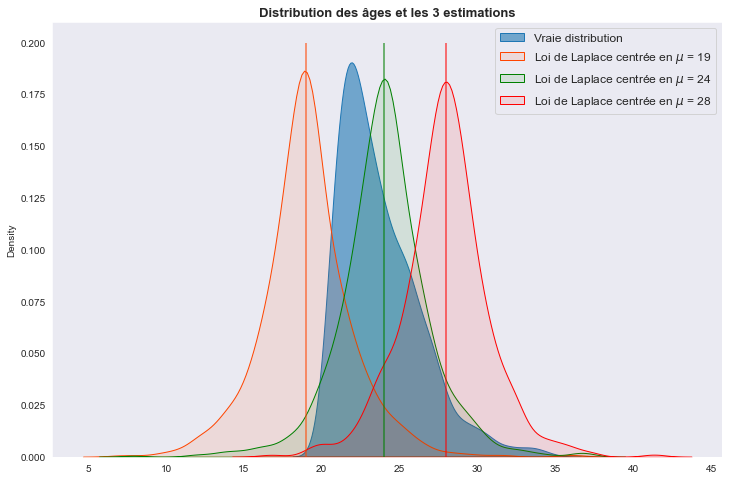

In [3]:
mu = [19, 24, 28]
sigma = 2.05
colors = ['orangered', 'green', 'red']
plt.figure(figsize = (12, 8))
plt.title('Distribution des âges et les 3 estimations', fontsize = 13, fontweight = 'bold')
sns.kdeplot(data, fill = True, alpha = .6, label = 'Vraie distribution')
ymin, ymax = plt.ylim()
for i, elem in enumerate(mu):
    sns.kdeplot(np.random.laplace(loc=elem, scale=sigma, size=1000),
        #np.random.normal(elem, sigma, 1000), 
        fill = True, alpha = .1, label = f'Loi de Laplace centrée en $\mu$ = {elem}', color = colors[i])
    np.random.laplace(loc=elem, scale=sigma, size=1000)
    plt.vlines(x = elem, ymin=ymin, ymax=ymax, alpha = .7, color = colors[i])
plt.legend(fontsize = 12)
plt.show()

In [4]:
for elem in mu:
    print(f'Log vraisemblance pour mu = {elem} : {np.sum(scipy.stats.laplace.logpdf(data, loc=elem, scale = sigma))}')

Log vraisemblance pour mu = 19 : -3718.558175331695
Log vraisemblance pour mu = 24 : -2432.8674691952074
Log vraisemblance pour mu = 28 : -3633.7504314646944


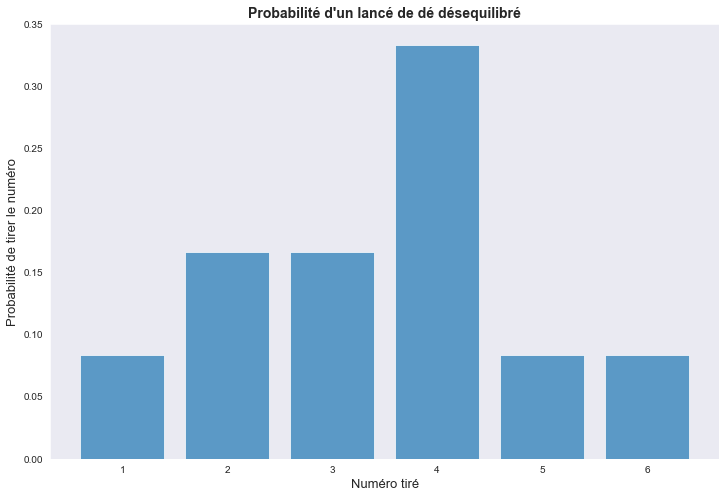

In [5]:
t = np.arange(1, 7)
p = [1/12, 1/6, 1/6, 2/6, 1/12 ,1/12]

plt.figure(figsize = (12, 8))
plt.title('Probabilité d\'un lancé de dé désequilibré', fontweight = 'bold', fontsize = 14)
plt.ylabel('Probabilité de tirer le numéro', fontsize = 13)
plt.xlabel('Numéro tiré', fontsize = 13)
plt.bar(t, height=p, alpha = .7)
plt.show()

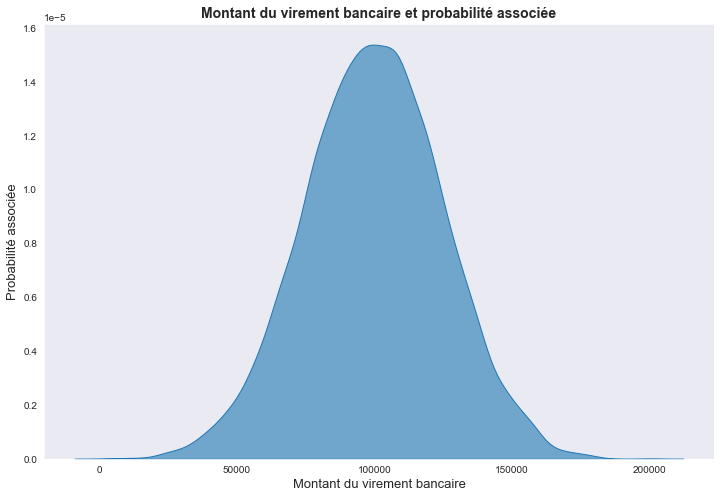

In [6]:
t = np.random.normal(loc = 100000, scale = 25000, size = 10000)
plt.figure(figsize = (12, 8))
plt.title('Montant du virement bancaire et probabilité associée', fontweight = 'bold', fontsize = 14)
plt.ylabel('Probabilité associée', fontsize = 13)
plt.xlabel('Montant du virement bancaire', fontsize = 13)
sns.kdeplot(t, alpha = .6, fill = True)
plt.show()

# La boîte magique

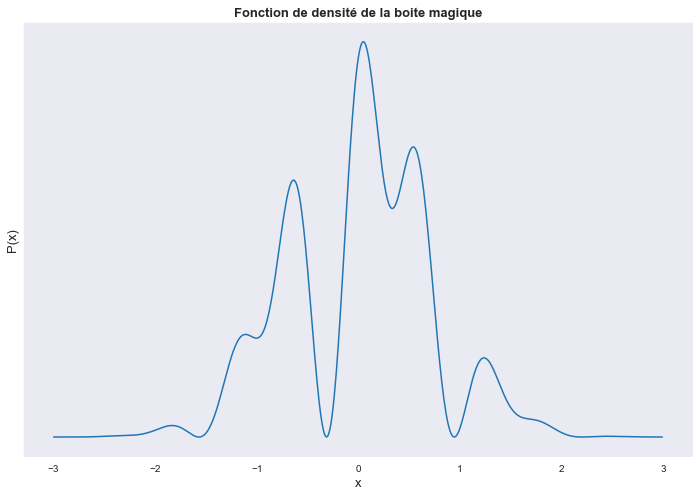

In [7]:
def targetdist(x):
        return np.exp(-x**2) * (2 + np.sin(x*5) + np.cos(x*10))
        
x = np.arange(-3,3, .01)
y = targetdist(x)

plt.figure(figsize=(12, 8))
plt.title('Fonction de densité de la boite magique', fontweight = 'bold', fontsize = 13)
plt.xlabel('x', fontsize = 13)
plt.ylabel('P(x)', fontsize = 13)
plt.yticks([])
plt.plot(x, y)
plt.show()

In [8]:
def prior(x):
    return targetdist(x)
        
def metropolis_algorithm(iterations, x_init, sigma = 1):
    
    x = x_init

    retour = pd.DataFrame()
    etat, valeur = list(), list()

    for i in range(iterations):

        y = np.random.normal(loc = x, scale = sigma)

        prior_x = prior(x)
        prior_proposal = prior(y)
        
        r = prior_proposal/prior_x

        if np.random.uniform(size = 1) <= r:
            valeur.append(y)
            x = y
            etat.append('Accepté')
        else:
            valeur.append(y)
            x = x
            etat.append('Rejeté')
    
    retour['Etat'] = etat
    retour['Valeur'] = valeur

    return retour

In [9]:
chaine = metropolis_algorithm(iterations = 10**6,
                                x_init = 1)    
                                 
chaine_acc = chaine[chaine['Etat'] == 'Accepté'].reset_index(drop = 'True')
chaine_ref = chaine[chaine['Etat'] == 'Refusé'].reset_index(drop = 'True')

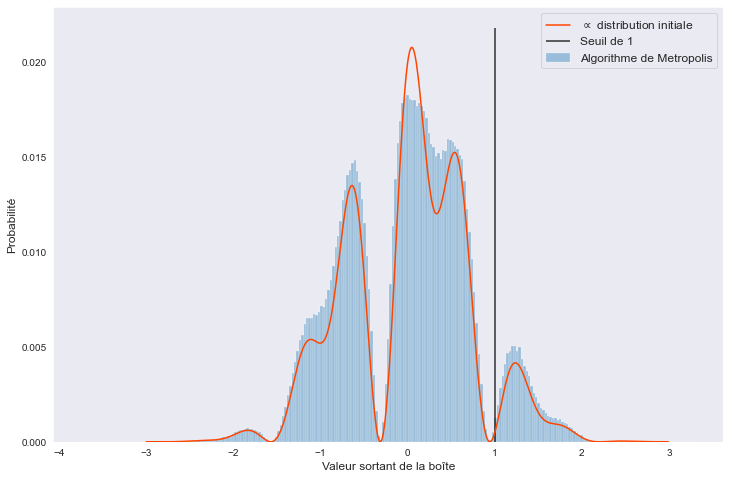

In [10]:
plt.figure(figsize = (12, 8))
plt.plot(x, y/150, label = '$\propto$ distribution initiale', c = 'orangered')
sns.histplot(chaine_acc,
            stat = 'probability', 
            alpha = .4, 
            label = 'Algorithme de Metropolis')
ymin, ymax = plt.ylim()
plt.vlines(x = 1, alpha = .8, label = 'Seuil de 1', ymin = ymin, ymax = ymax)
plt.legend(fontsize = 12)
plt.ylabel('Probabilité', fontsize = 12)
plt.xlabel('Valeur sortant de la boîte', fontsize = 12)
plt.show()

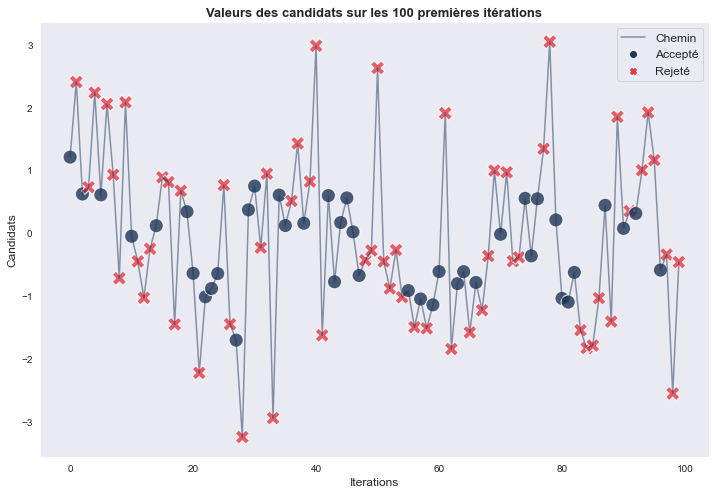

In [11]:
plt.figure(figsize = (12, 8))
plt.title('Valeurs des candidats sur les 100 premières itérations', fontsize = 13, fontweight = 'bold')
sns.scatterplot(data = chaine[:100], 
                x = np.arange(100), 
                y = 'Valeur', 
                hue = 'Etat', 
                style = 'Etat', 
                palette = ['#1d3557', '#e63946'], 
                style_order=['Accepté', 'Rejeté'],
                alpha = .8,
                s = 200)

plt.plot(np.arange(100), chaine['Valeur'][:100], label = 'Chemin', alpha = .5, c = '#1d3557')
                
plt.legend(fontsize = 12)
plt.xlabel('Iterations', fontsize = 12)
plt.ylabel('Candidats', fontsize = 12)
plt.show()

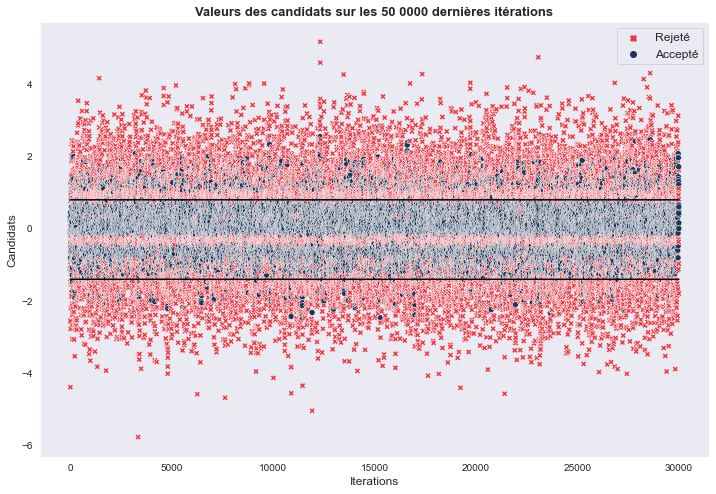

In [12]:
plt.figure(figsize = (12, 8))
plt.title('Valeurs des candidats sur les 50 0000 dernières itérations', fontsize = 13, fontweight = 'bold')
sns.scatterplot(data = chaine[970000:], 
                x = np.arange(chaine[970000:].shape[0]), 
                y = 'Valeur', 
                hue = 'Etat', 
                style = 'Etat', 
                style_order=['Accepté', 'Rejeté'],
                palette = ['#e63946','#1d3557'], 
                alpha = 1)

plt.plot([.8]*chaine[970000:].shape[0], c = 'black') 
plt.plot([-1.4]*chaine[970000:].shape[0], c = 'black')  
plt.xlabel('Iterations', fontsize = 12)
plt.ylabel('Candidats', fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [13]:
print('Les chances piocher un nombre supérieur à 1 sont de',int(sum(chaine_acc['Valeur'] > 1)/chaine_acc.shape[0] * 100),'%')

Les chances piocher un nombre supérieur à 1 sont de 8 %


## Etudes des tâches solaires

In [14]:
from dateutil.parser import parse
dateparse=lambda dates:parse(dates)

df = pd.read_csv('Sunspots.csv', usecols=['Date','Monthly Mean Total Sunspot Number'],parse_dates=['Date'], date_parser=dateparse)
df = df.rename(columns = {'Monthly Mean Total Sunspot Number':'Nombre de Sunspots'})
df['Nombre de Sunspots'] = df['Nombre de Sunspots'] + .1

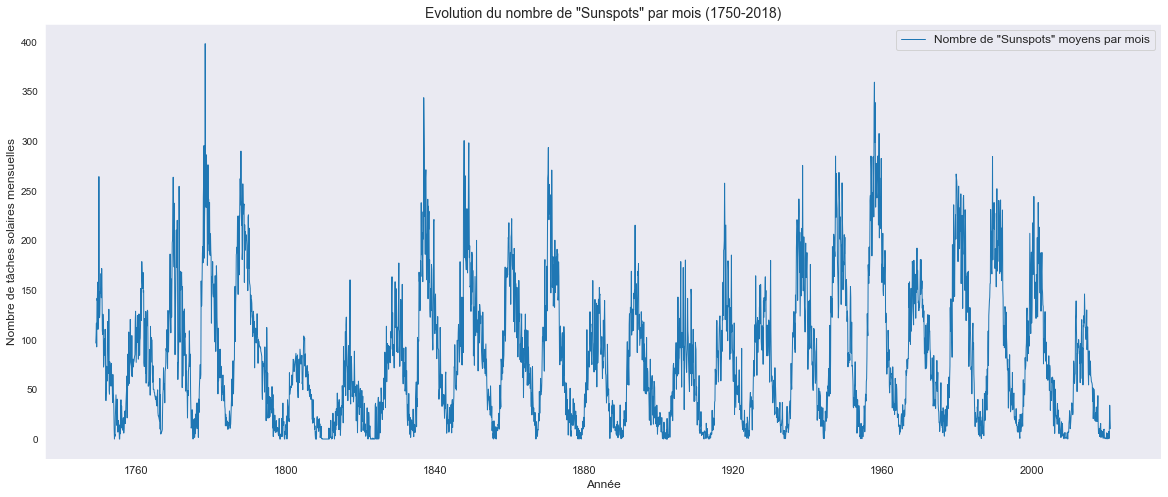

In [15]:
plt.figure(figsize = (20, 8))
plt.plot(df['Date'], df['Nombre de Sunspots'], label = 'Nombre de "Sunspots" moyens par mois', lw = 1)
plt.xlabel('Année', fontsize = 12)
plt.ylabel('Nombre de tâches solaires mensuelles', fontsize = 12)
plt.title('Evolution du nombre de "Sunspots" par mois (1750-2018)', fontsize = 14)
plt.legend(fontsize = 12)
plt.xticks(fontsize = 11)
plt.show()

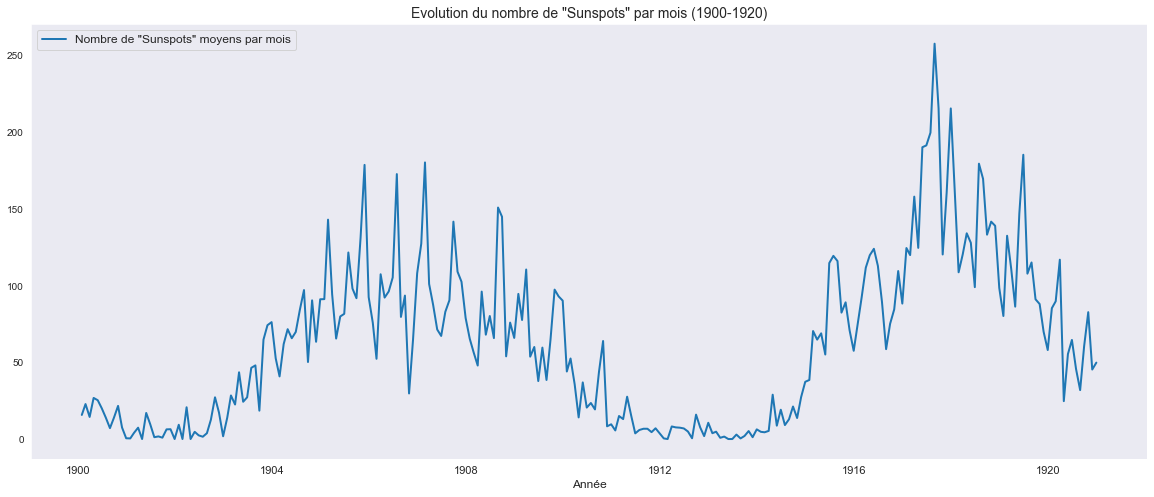

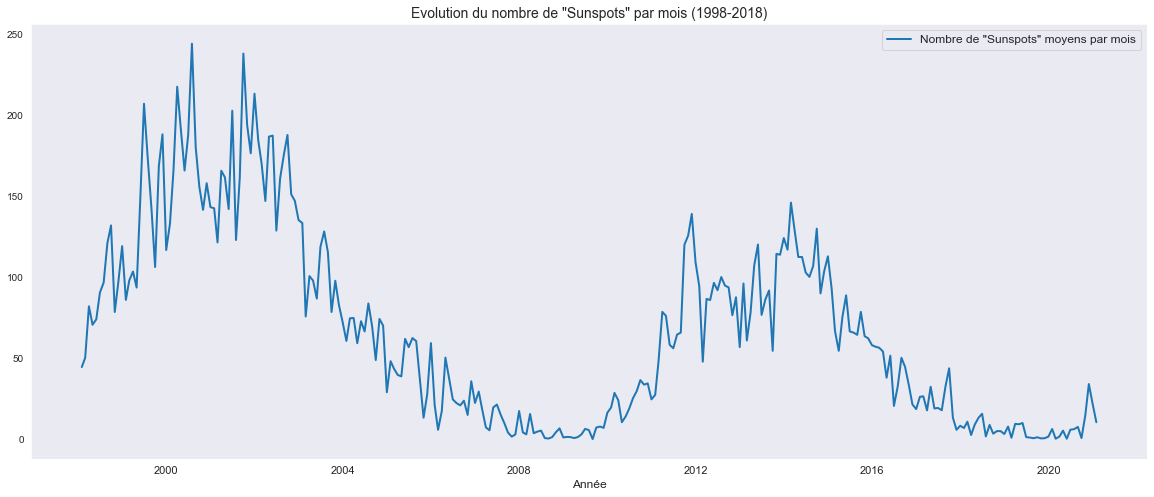

In [16]:
plt.figure(figsize = (20, 8))
temp_df=df[(pd.DatetimeIndex(df['Date']).year >= 1900) & (pd.DatetimeIndex(df['Date']).year <= 1920)]
plt.plot(temp_df['Date'], temp_df['Nombre de Sunspots'], label = 'Nombre de "Sunspots" moyens par mois', lw = 2)
plt.xlabel('Année', fontsize = 12)
plt.title('Evolution du nombre de "Sunspots" par mois (1900-1920)', fontsize = 14)
ymin, ymax = plt.ylim()
plt.legend(fontsize = 12)
plt.xticks(fontsize = 11)
plt.show()

plt.figure(figsize = (20, 8))
temp_df=df[pd.DatetimeIndex(df['Date']).year >= 1998]
plt.plot(temp_df['Date'], temp_df['Nombre de Sunspots'], label = 'Nombre de "Sunspots" moyens par mois', lw = 2)
plt.xlabel('Année', fontsize = 12)
plt.title('Evolution du nombre de "Sunspots" par mois (1998-2018)', fontsize = 14)
ymin, ymax = plt.ylim()
plt.legend(fontsize = 12)
plt.xticks(fontsize = 11)
plt.show()

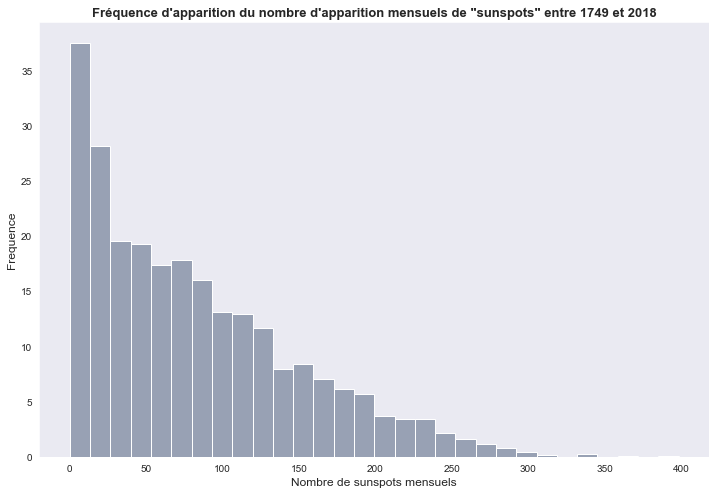

In [17]:
plt.figure(figsize = (12, 8))
sns.histplot(x = df['Nombre de Sunspots'], 
            alpha = .4, 
            bins = 30,
            stat = 'frequency',
            color = '#1d3557')
plt.title('Fréquence d\'apparition du nombre d\'apparition mensuels de "sunspots" entre 1749 et 2018', fontsize = 13, fontweight = 'bold')
plt.xlabel('Nombre de sunspots mensuels', fontsize = 12)
plt.ylabel('Frequence', fontsize = 12)
plt.show()

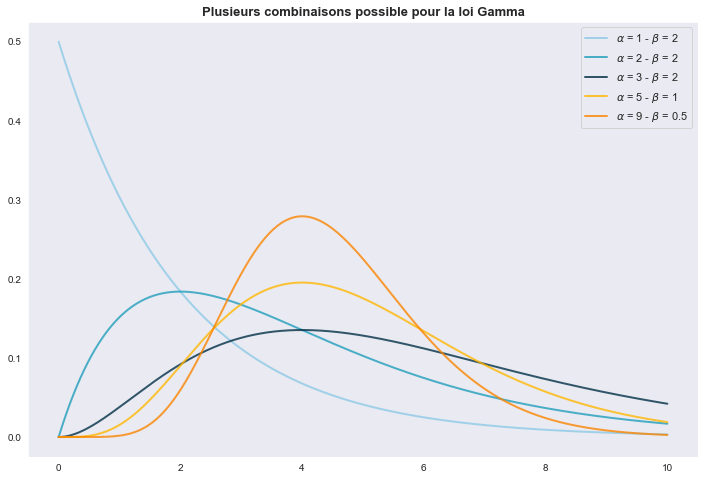

In [18]:
a = [1, 2, 3, 5, 9]
b = [2, 2, 2, 1, 0.5]

plt.figure(figsize = (12, 8))
colors = ['#8ecae6', '#219ebc', '#023047', '#ffb703', '#fb8500']
for i in range(len(a)):
    x = np.linspace(0, 10, 1000)
    y = scipy.stats.gamma.pdf(x, a=a[i], scale=b[i])
    plt.plot(x, y, label = r'$\alpha$ = ' + f'{a[i]} - ' + r'$\beta$ = ' + f'{b[i]}', lw = 2, alpha = .8, c = colors[i])

plt.title('Plusieurs combinaisons possible pour la loi Gamma', fontweight = 'bold', fontsize = 13)
plt.legend(fontsize = 11)
plt.show()

In [19]:
def prior(alpha, beta):
    if(alpha<=0 or beta <=0):
        return 0
    else:
        return 1

def metropolis_hastings(prior, param_init, iterations, data):
    
    r = pd.DataFrame()
    a, b, etat = list(), list(), list()
        
    alpha, beta = param_init
     
    for i in range(iterations):
        # Générations de nouveaux paramètres
        alpha_new =  np.random.normal(alpha, 0.05, (1,)) 
        beta_new =  np.random.normal(beta, 5, (1,)) 

        ## Vraisemblances
        x_lik = np.sum((alpha-1)*np.log(data) - (1/beta)*data - alpha*np.log(beta) - np.log(math.gamma(alpha)))
        x_new_lik = np.sum((alpha_new-1)*np.log(data) - (1/beta_new)*data - alpha_new*np.log(beta_new) - np.log(math.gamma(alpha_new)))
        
        ## Probabilités à priori
        prior_current = np.log(prior(alpha, beta))
        prior_new = np.log(prior(alpha_new, beta_new))
        
        ## Probabilités à posterioris
        p_current = x_lik + prior_current # log(Q(y|x)) + log(p(x))
        p_new = x_new_lik + prior_new # log(Q(x|y) + log(p(y)))
        
        # Règle d'acceptation
        r = np.exp(p_new - p_current)

        if min(r, 1) > np.random.uniform(0, 1):    
            etat.append('Accepté')
            ## Les candidats générés deviennent les nouveaux paramètres
            alpha = alpha_new; beta = beta_new               
             
        else:
            etat.append('Rejeté')
        
        a.append(alpha[0]); b.append(beta[0])   
                 
    r = pd.DataFrame()
    r['Etat'] = etat; r['Alpha'] = a; r['Beta'] = b  
    return r

chaine_mh = metropolis_hastings(prior,[4, 10], 100000, df['Nombre de Sunspots'])

TypeError: 'int' object is not subscriptable

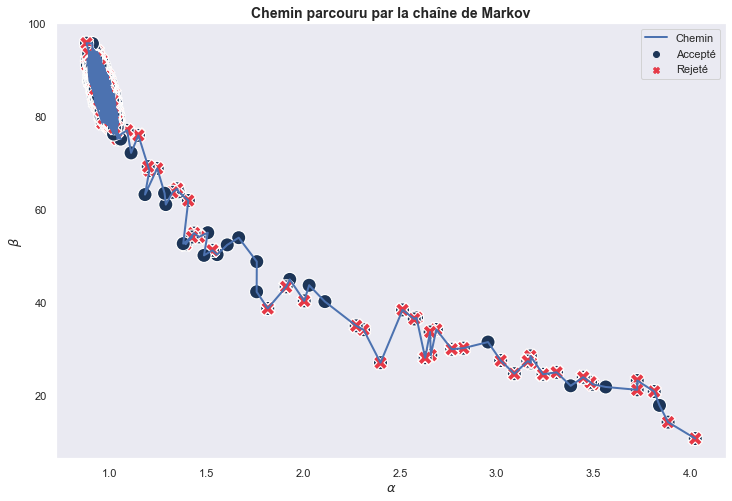

In [ ]:
plt.figure(figsize = (12, 8))


sns.scatterplot(data = chaine_mh,
                x = 'Alpha',
                y = 'Beta',
                style = 'Etat',
                hue = 'Etat',
                s = 200,
                palette = ['#1d3557', '#e63946'])

plt.plot(chaine_mh['Alpha'], chaine_mh['Beta'], label = 'Chemin', lw = 2)
plt.title('Chemin parcouru par la chaîne de Markov', fontweight = 'bold', fontsize = 14)
plt.xlabel(r'$\alpha$', fontsize = 13)
plt.ylabel(r'$\beta$', fontsize = 13)
plt.legend()
plt.show()

Text(43.125, 0.5, '$\\beta$')

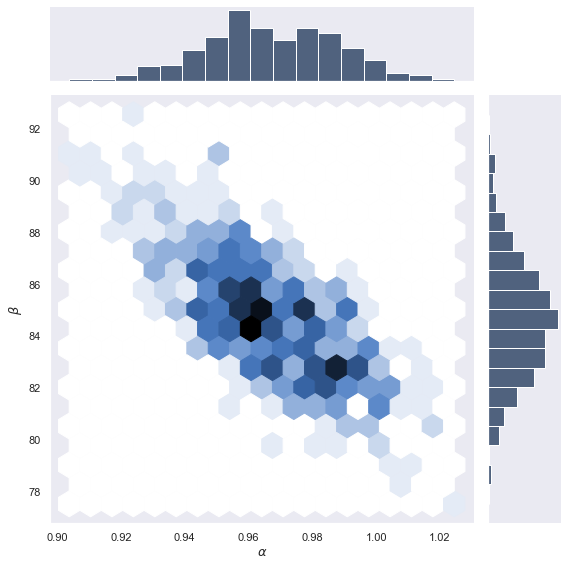

In [ ]:
a, b = chaine_mh[chaine_mh['Etat'] == 'Accepté'][-500:]['Alpha'], chaine_mh[chaine_mh['Etat'] == 'Accepté']['Beta'][-500:]

sns.jointplot(x=a, y=b, kind="hex", color="#1d3557", height = 8)
plt.xlabel(r'$\alpha$', fontsize = 13)
plt.ylabel(r'$\beta$', fontsize = 13)

##  Analyse de la convergence de la chaîne

In [ ]:
chaine1 = metropolis_hastings(prior,[4, 10], 50000, df['Nombre de Sunspots'])
a1, b1 = chaine1[chaine1['Etat'] == 'Accepté']['Alpha'], chaine1[chaine1['Etat'] == 'Accepté']['Beta']

chaine2 = metropolis_hastings(prior,[4, 10], 50000, df['Nombre de Sunspots'])
a2, b2 = chaine2[chaine2['Etat'] == 'Accepté']['Alpha'], chaine2[chaine2['Etat'] == 'Accepté']['Beta']

C:\Users\bapti\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in exp


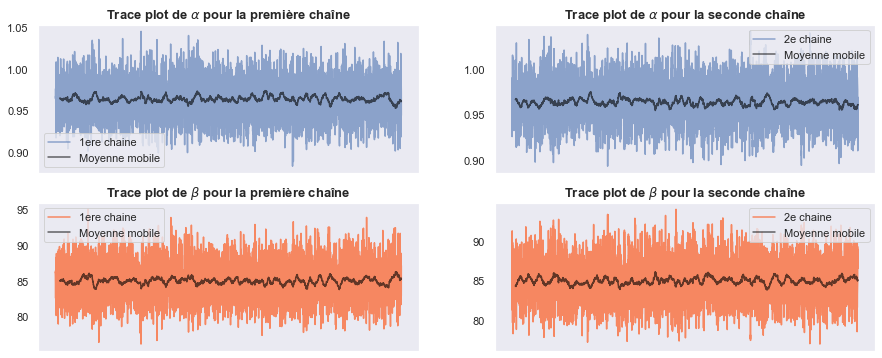

In [ ]:
## Convergence pour alpha ##
fig = plt.figure(figsize=(15,6))

plt.subplot(2, 2, 1)
plt.title('Alpha')
plt.plot(a1[500:], label = '1ere chaine', alpha = .6)
plt.plot(a1[500:].rolling(100).mean(), c = 'black', label = 'Moyenne mobile', alpha = .6)
plt.xticks([])
plt.legend()
plt.title(r'Trace plot de $\alpha$ pour la première chaîne', fontweight = 'bold', fontsize = 13)

plt.subplot(2, 2, 2)
plt.plot(a2[500:], label = '2e chaine', alpha = .6)
plt.plot(a2[500:].rolling(100).mean(), c = 'black', label = 'Moyenne mobile', alpha = .6)
plt.xticks([])
plt.title(r'Trace plot de $\alpha$ pour la seconde chaîne', fontweight = 'bold', fontsize = 13)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(b1[500:], label = '1ere chaine', alpha = .6, c = 'orangered')
plt.plot(b1[500:].rolling(100).mean(), c = 'black', label = 'Moyenne mobile', alpha = .6)
plt.xticks([])
plt.legend()
plt.title(r'Trace plot de $\beta$ pour la première chaîne', fontweight = 'bold', fontsize = 13)

plt.subplot(2, 2, 4)
plt.plot(b2[500:], label = '2e chaine', alpha = .6, c = 'orangered')
plt.plot(b2[500:].rolling(100).mean(), c = 'black', label = 'Moyenne mobile', alpha = .6)
plt.xticks([])
plt.title(r'Trace plot de $\beta$ pour la seconde chaîne', fontweight = 'bold', fontsize = 13)
plt.legend()
plt.show()

## Prévisions

In [ ]:
final_alpha = a.mean()
final_beta = b.mean()

In [ ]:
final_alpha

0.9661013020464894

In [ ]:
final_beta

84.83858070219677

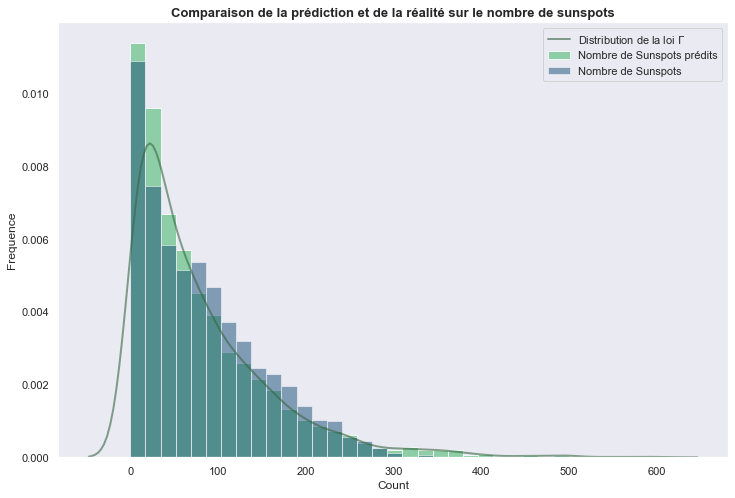

In [ ]:
pred = np.random.gamma(final_alpha, final_beta, df.shape[0])

plt.figure(figsize=(12,8))
plt.hist(pred,bins=np.linspace(0,500,30) ,density=True, alpha = .8, label="Nombre de Sunspots prédits", color = '#76c893')
plt.hist(df['Nombre de Sunspots'], np.linspace(0,500,30), alpha= .5, density=True, label="Nombre de Sunspots", color = '#184e77')
sns.kdeplot(pred, label = r'Distribution de la loi $\Gamma$', alpha = .6, lw = 2, c = '#386641')
plt.title('Comparaison de la prédiction et de la réalité sur le nombre de sunspots', fontsize = 13, fontweight = 'bold')
plt.xlabel("Count")
plt.ylabel("Frequence")
plt.legend()
plt.show()